In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
##### **Variables**
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
#####**Data Description**
#####**Demographic:**
• Sex: male or female("M" or "F")  
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
##### **Behavioral**
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")  
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
##### **Medical( history)**
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)  
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)  
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)  
• Diabetes: whether or not the patient had diabetes (Nominal)  
##### **Medical(current)**
• Tot Chol: total cholesterol level (Continuous)  
• Sys BP: systolic blood pressure (Continuous)  
• Dia BP: diastolic blood pressure (Continuous)  
• BMI: Body Mass Index (Continuous)  
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)  
• Glucose: glucose level (Continuous)
##### **Predict variable (desired target)**
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

#**Import necessory libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# **Reading and understanding the data**

In [ ]:
# Reading the CSV
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/00_Team Capstone Projects/03_Supervised ML_Classificcation/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Shape of the dataset
df.shape

(3390, 17)

In [6]:
# Lets see information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
# Column names
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
# Lets check the missing values
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [9]:
# Lets check the % missing values
(100*df.isnull().sum()/len(df)).sort_values(ascending=False)

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64

In [10]:
# Lets understand the variables and impute missing values
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [11]:
# Set darkgrid for all the plots
sns.set_style('darkgrid')

<function matplotlib.pyplot.show>

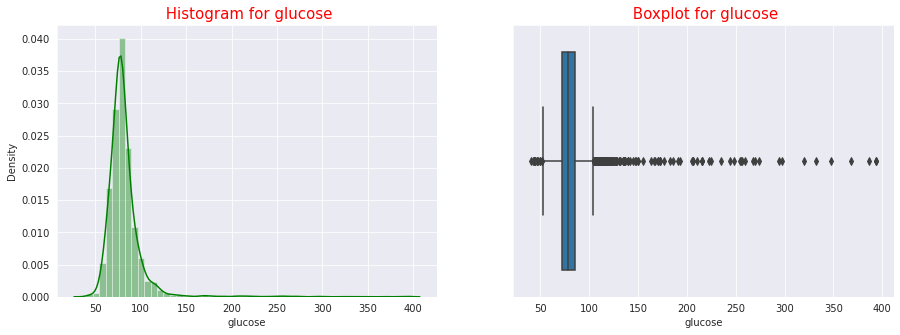

In [36]:
# plot the histogram and box plot to check presence of outliers
plt.figure(figsize=(15,5))
# Histogram
plt.subplot(1,2,1)
sns.distplot(df['glucose'], color='g')
plt.title(' Histogram for glucose', color='r', fontsize=15)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(df['glucose'])
plt.title(' Boxplot for glucose', color='r', fontsize=15)
plt.show

- **There are ouliers are present in the dataset, So we will impute missing values with median.**

In [22]:
# Impute missing values
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [23]:
# Education - Missing value imputation
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [30]:
# Missing values in education will be imputed by mode. It is nominal columns
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [32]:
# BPMeds - Missing values imputation
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [33]:
# Missing values in education will be imputed by mode. It is nominal columns
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

In [37]:
# totChol - Missing value imputation
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

<function matplotlib.pyplot.show>

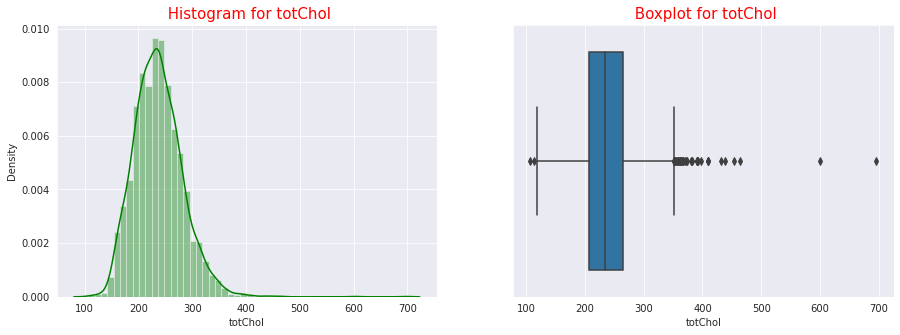

In [38]:
# plot the histogram and box plot to check presence of outliers
plt.figure(figsize=(15,5))
# Histogram
plt.subplot(1,2,1)
sns.distplot(df['totChol'], color='g')
plt.title(' Histogram for totChol', color='r', fontsize=15)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(df['totChol'])
plt.title(' Boxplot for totChol', color='r', fontsize=15)
plt.show

- **Outliers are preset in the dataset, so median is right statistic to impute missing values.**

In [39]:
# Impute missing values with median
df['totChol'].fillna(df['totChol'].median(), inplace=True)

In [41]:
# cigsPerDay - Missing value imputation
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

<function matplotlib.pyplot.show>

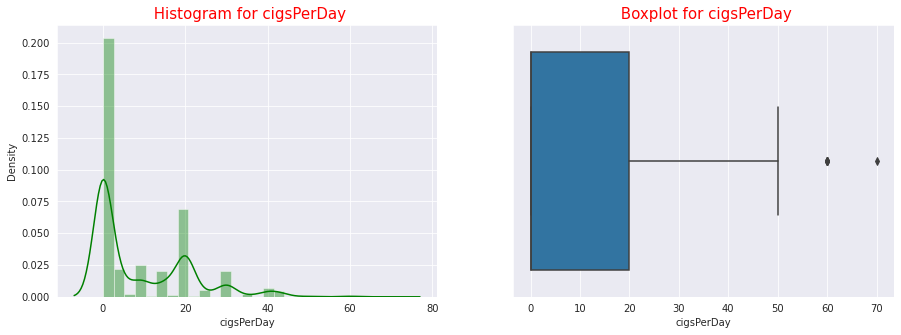

In [47]:
# plot the histogram and box plot to check presence of outliers
plt.figure(figsize=(15,5))
# Histogram
plt.subplot(1,2,1)
sns.distplot(df['cigsPerDay'], color='g')
plt.title(' Histogram for cigsPerDay', color='r', fontsize=15)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(df['cigsPerDay'])
plt.title(' Boxplot for cigsPerDay', color='r', fontsize=15)
plt.show

- **Smoking more than 80 cigarates per day is not logical. So we will take care of the outliers later. But to impute missing values we will consider median statistics.**  
https://www.cdc.gov/media/releases/2018/p0118-smoking-rates-declining.html#:~:text=Among%20daily%20smokers%2C%20the%20average,to%2014%20cigarettes%20in%202016.

In [43]:
# Impute missing values with median
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [46]:
# BMI - Missing value imputation
df.BMI.describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

<function matplotlib.pyplot.show>

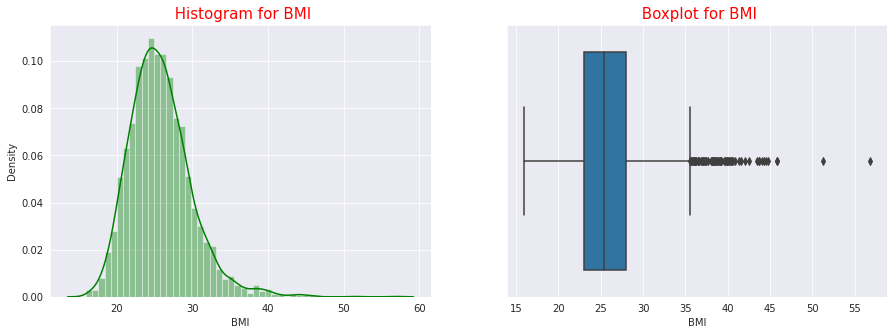

In [48]:
# plot the histogram and box plot to check presence of outliers
plt.figure(figsize=(15,5))
# Histogram
plt.subplot(1,2,1)
sns.distplot(df['BMI'], color='g')
plt.title(' Histogram for BMI', color='r', fontsize=15)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(df['BMI'])
plt.title(' Boxplot for BMI', color='r', fontsize=15)
plt.show

In [49]:
# Impute missing values with median
df['BMI'].fillna(df['BMI'].median(), inplace=True)

- All other missing values will be droped.

In [51]:
# Dropping missing values
df.dropna(inplace=True)

In [53]:
# Lets check the missing values
df.isnull().sum().sort_values(ascending=False)

id                 0
diabetes           0
glucose            0
heartRate          0
BMI                0
diaBP              0
sysBP              0
totChol            0
prevalentHyp       0
age                0
prevalentStroke    0
BPMeds             0
cigsPerDay         0
is_smoking         0
sex                0
education          0
TenYearCHD         0
dtype: int64